In [3]:
# Import necessary libraries
from matplotlib import image
from matplotlib import pyplot
import numpy as np
from PIL import Image


In [4]:
def process_image(n, img_arr, original_dimensions):
    # Implementation of K-Mean algorithm starts here
    k = n

    # Pick random centroids
    centroids = img_arr[np.random.choice(img_arr.shape[0], k)]
    old_centroids = centroids.copy()

    # Initialize empty clusters
    clusters = {}
    flag = True
    
    while(flag or ((old_centroids - centroids) > 5).all()):
        flag = False
        old_centroids = centroids.copy()

        for i in range(k):
            clusters[i] = []

        # Compute distance of each point from all centroids
        for point in img_arr:
            dist = []
            for centroid in centroids:
                dist.append(np.sum(np.absolute(point - centroid)))
            clusters[dist.index(min(dist))].append(point)

        # Compute mean for cluster and update centroid
        for i in range(k):
            centroids[i] = np.average(clusters[i], axis=0)

    # Update image pixels with calculated centroids
    for i in clusters:
        for j in clusters[i]:
            row = (np.where((img_arr == j).all(axis=1))[0])[0]
            img_arr[row, :] = centroids[i]

    img_arr = img_arr.reshape(original_dimensions)

    img = Image.fromarray(img_arr, 'RGB')
    img.save('processed.jpg')
    img.show()

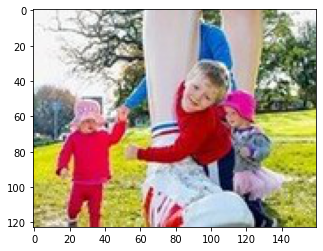

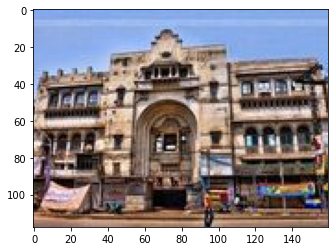

In [5]:
# Read images
image1 = image.imread('children.jpg')
image2 = image.imread('building.jpg')

# Display images
pyplot.imshow(image1)
pyplot.show()
pyplot.imshow(image2)
pyplot.show()

# Save image dimensions
original_dimensions1 = image1.shape
original_dimensions2 = image2.shape

# Convert images to 3D arrays
img_3d_1 = np.array(image1)
img_3d_2 = np.array(image2)

# Convert images to 2D arrays
img_arr_1 = img_3d_1.reshape(-1, 3)
img_arr_2 = img_3d_2.reshape(-1, 3)

# Apply algorithm
process_image(10, img_arr_1, original_dimensions1)
# process_image(10, img_arr_2, original_dimensions2)


# Comment

It can seen that by running K-Mean clustering algorithm with higher value of K, the processed image has more sharpness and more distict boundaries. The size of image before and after processing remains almost same.
Moreover, if k is small then algorithm may give odd results sometimes. It is because the random centroids that have been chosen may not have much distance between them or the algorithm did not perform much iterations to adjust centroids.